outlier detection code (idea drop to take in process due to some reasone which i have mentioned in the report)

V1 column ------------------------------------------------------------------------

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

import numpy as np

# Load the dataset
original_dataset_path = 'creditcard.csv'
df = pd.read_csv(original_dataset_path)

# Preprocessing phase 
# Select columns
selected_columns = ['Time', 'V1', 'Amount', 'Class']
df_selected = df[selected_columns]

# Selection of 60 fraudulent transactions
df_fraud = df_selected[df_selected['Class'] == 1].sample(n=60, random_state=1)

# Selection of 100 non-fraudulent transactions
df_non_fraud = df_selected[df_selected['Class'] == 0].sample(n=100, random_state=1)

# Combining process of the selected samples
df_balanced = pd.concat([df_fraud, df_non_fraud])

# Outlier detection function using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data,75)
    quartile_difference  = Q3 - Q1
    lower_bound = Q1 - 1.5 * quartile_difference
    upper_bound = Q3 + 1.5 * quartile_difference
    return (data < lower_bound) | (data > upper_bound)

# Apply outlier detection to each feature
outliers_iqr = df_balanced[['Time', 'V1', 'Amount']].apply(detect_outliers_iqr)

# Print the number of outliers detected
print("Number of outliers detected:")
print(outliers_iqr.sum())

# Removing outliers from the balanced dataset
df_no_outliers = df_balanced[~outliers_iqr.any(axis=1)]

# Split data into features and target
X_balanced = df_no_outliers[['Time', 'V1', 'Amount']]
y_balanced = df_no_outliers['Class']

# Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1)

# Build the logistic regression model
model_balanced = LogisticRegression(random_state=1, max_iter=1000)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Predictions on the test set
y_pred_balanced = model_balanced.predict(X_test_balanced)

# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Print the results
print(f"Accuracy: {accuracy_balanced}")
print("Confusion Matrix:")
print(conf_matrix_balanced)
print("Classification Report-------------------------")
print(class_report_balanced)

Number of outliers detected:
Time       0
V1        20
Amount    20
dtype: int64
Accuracy: 0.8648648648648649
Confusion Matrix:
[[32  0]
 [ 5  0]]
Classification Report-------------------------
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       0.00      0.00      0.00         5

    accuracy                           0.86        37
   macro avg       0.43      0.50      0.46        37
weighted avg       0.75      0.86      0.80        37



c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

v1 column

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, 
    precision_score, recall_score, f1_score, roc_curve, 
    precision_recall_curve, roc_auc_score
)

Accuracy: 0.8166666666666667
precision: 0.8367346938775511
recall: 0.4659090909090909
f1 score: 0.5985401459854014
Confusion Matrix:
[[204   8]
 [ 47  41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       212
           1       0.84      0.47      0.60        88

    accuracy                           0.82       300
   macro avg       0.82      0.71      0.74       300
weighted avg       0.82      0.82      0.80       300



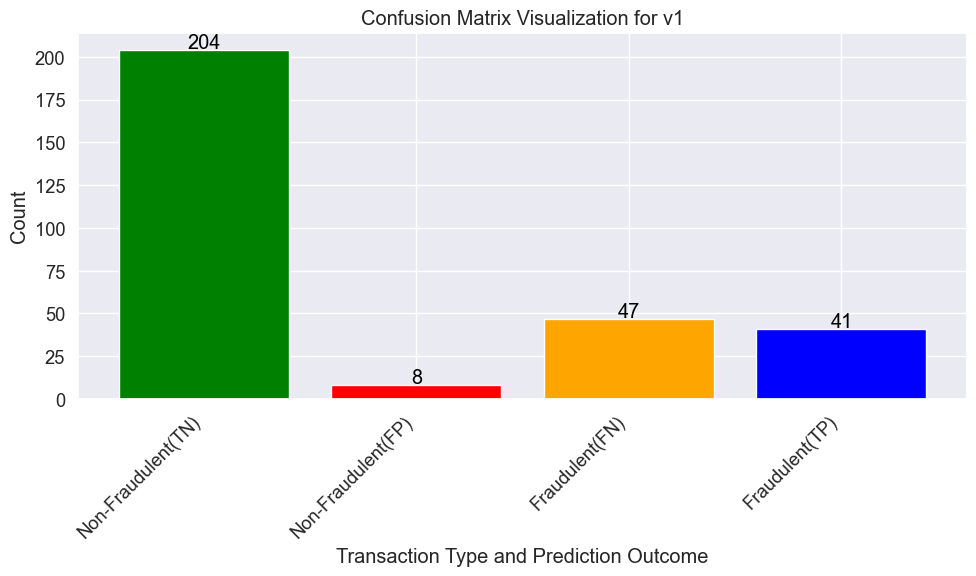

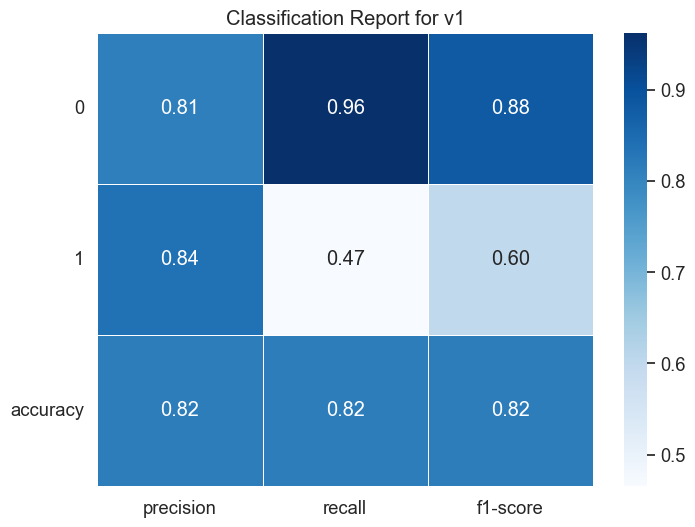

In [60]:
sns.set(font_scale=1.2)
# Load the dataset
original_dataset_path = 'creditcard.csv'
df = pd.read_csv(original_dataset_path)

# Preprocessing phase 
# Select columns
selected_columns = ['Time', 'V1', 'Amount', 'Class']
df_selected = df[selected_columns]

# Selection of 300 fraudulent transactions
df_fraud = df_selected[df_selected['Class'] == 1].sample(n=300, random_state=1)

# Selection of 700 non-fraudulent transactions
df_non_fraud = df_selected[df_selected['Class'] == 0].sample(n=700, random_state=1)

# Combining process of the selected samples
df_balanced = pd.concat([df_fraud, df_non_fraud])

# Split data into features and target
X_balanced = df_balanced[['Time', 'V1', 'Amount']]
y_balanced = df_balanced['Class']

# Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1)

# Build the logistic regression model
model_balanced = LogisticRegression(random_state=1, max_iter=1000)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Predictions on the test set
y_pred_balanced = model_balanced.predict(X_test_balanced)

# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
precesion_balanced = precision_score(y_test_balanced, y_pred_balanced)
recall_balanced = recall_score(y_test_balanced, y_pred_balanced)
f1_balanced = f1_score(y_test_balanced, y_pred_balanced)

conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Print the results
print(f"Accuracy: {accuracy_balanced}")
print(f"precision: {precesion_balanced}")
print(f"recall: {recall_balanced}")
print(f"f1 score: {f1_balanced}")
print("Confusion Matrix:")
print(conf_matrix_balanced)
print("Classification Report:")
print(class_report_balanced)

# Visualization of the confusion matrix as a bar graph with updated labels and counts
labels = [
    'Non-Fraudulent(TN)', 
    'Non-Fraudulent(FP)', 
    'Fraudulent(FN)', 
    'Fraudulent(TP)'
]
counts = [conf_matrix_balanced[0, 0], conf_matrix_balanced[0, 1], conf_matrix_balanced[1, 0], conf_matrix_balanced[1, 1]]

plt.figure(figsize=(10, 6), dpi = 100)
bars = plt.bar(labels, counts, color=['green', 'red', 'orange', 'blue'])

# Add counts on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - (-1), f'{count}', ha='center', color='black')

plt.title('Confusion Matrix Visualization for v1')
plt.xlabel('Transaction Type and Prediction Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Get the classification report as a dictionary
report = classification_report(y_test_balanced, y_pred_balanced, output_dict=True)

# Convert the dictionary to a DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column and the macro avg and weighted avg rows
report_df = report_df.drop(columns=['support'])
report_df = report_df.drop(['macro avg', 'weighted avg'])

# Plotting the heatmap
plt.figure(figsize=(8, 6), dpi = 100)
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)

plt.title('Classification Report for v1')
plt.yticks(rotation=0)
plt.show()

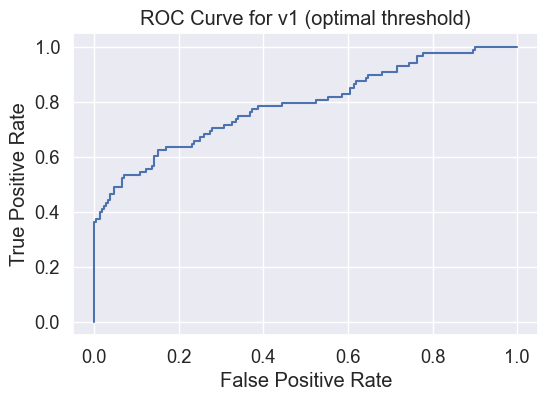

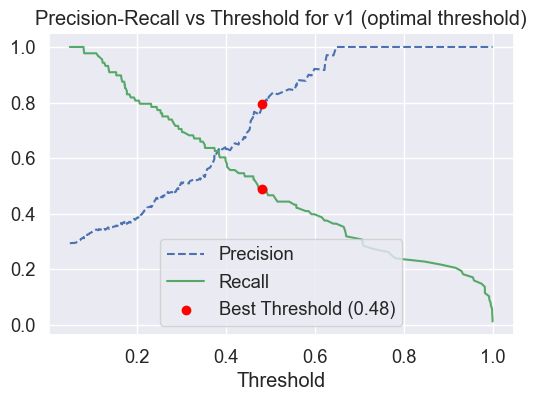

Best Threshold based on Accuracy: 0.48 with Accuracy: 0.82
Accuracy with custom threshold: 0.8166666666666667
precision: 0.8113207547169812
recall: 0.48863636363636365
f1 score: 0.6099290780141844
Confusion Matrix with custom threshold:
[[202  10]
 [ 45  43]]
Classification Report with custom threshold:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       212
           1       0.81      0.49      0.61        88

    accuracy                           0.82       300
   macro avg       0.81      0.72      0.75       300
weighted avg       0.82      0.82      0.80       300



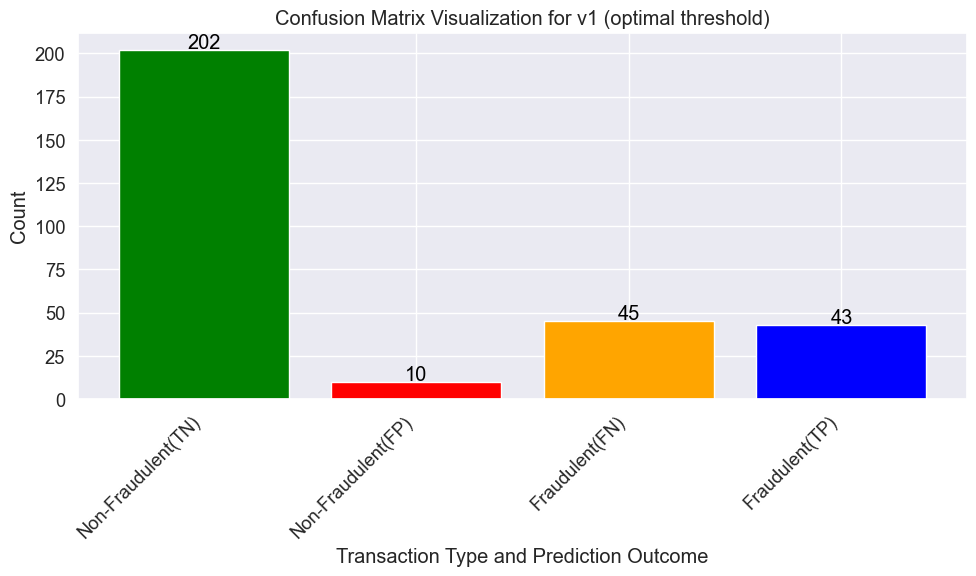

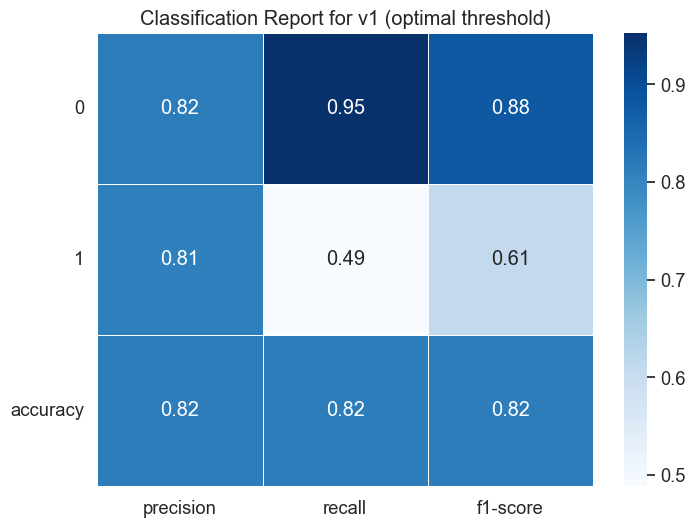

In [61]:


# Step 1: Predict probabilities on the test set
y_probs_balanced = model_balanced.predict_proba(X_test_balanced)[:, 1]

# Step 2: Plot ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test_balanced, y_probs_balanced)
plt.figure( dpi = 100)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for v1 (optimal threshold)")
plt.show()

# Step 3: Plot Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_balanced, y_probs_balanced)

# Find the optimal threshold based on F1 score
thresholds_range = np.linspace(0, 1, num=100)
best_f1 = 0
best_threshold = 0
best_accuracy = 0

for threshold in thresholds_range:
    y_pred_temp = (y_probs_balanced >= threshold).astype(int)
    current_f1 = f1_score(y_test_balanced, y_pred_temp)
    current_accuracy = accuracy_score(y_test_balanced, y_pred_temp)
    
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold



# Plot Precision-Recall Curve and highlight the best threshold
plt.figure(dpi = 100)
plt.plot(thresholds_pr, precision[:-1], "b--", label="Precision")
plt.plot(thresholds_pr, recall[:-1], "g-", label="Recall")

# Highlight the best threshold
optimal_idx_pr = np.argmin(np.abs(thresholds_pr - best_threshold))
plt.scatter(thresholds_pr[optimal_idx_pr], precision[optimal_idx_pr], color='red', label=f"Best Threshold ({best_threshold:.2f})", zorder=5)
plt.scatter(thresholds_pr[optimal_idx_pr], recall[optimal_idx_pr], color='red', zorder=5)

plt.xlabel("Threshold")
plt.title("Precision-Recall vs Threshold for v1 (optimal threshold)")
plt.legend(loc="best")
plt.show()

print(f"Best Threshold based on Accuracy: {best_threshold:.2f} with Accuracy: {best_accuracy:.2f}")

# Step 5: Predict with the best threshold
y_pred_balanced_custom = (y_probs_balanced >= best_threshold).astype(int)

# Step 6: Evaluate the model
accuracy_balanced_custom = accuracy_score(y_test_balanced, y_pred_balanced_custom)
precesion_balanced_custom = precision_score(y_test_balanced, y_pred_balanced_custom)
recall_balanced_custom = recall_score(y_test_balanced, y_pred_balanced_custom)
f1_balanced_custom = f1_score(y_test_balanced, y_pred_balanced_custom)
conf_matrix_balanced_custom = confusion_matrix(y_test_balanced, y_pred_balanced_custom)
class_report_balanced_custom = classification_report(y_test_balanced, y_pred_balanced_custom)

# Print the results
print(f"Accuracy with custom threshold: {accuracy_balanced_custom}")
print(f"precision: {precesion_balanced_custom}")
print(f"recall: {recall_balanced_custom}")
print(f"f1 score: {f1_balanced_custom}")
print("Confusion Matrix with custom threshold:")
print(conf_matrix_balanced_custom)
print("Classification Report with custom threshold:")
print(class_report_balanced_custom)


# Visualization of the confusion matrix as a bar graph with updated labels and counts
labels = [
    'Non-Fraudulent(TN)', 
    'Non-Fraudulent(FP)', 
    'Fraudulent(FN)', 
    'Fraudulent(TP)'
]
counts = [conf_matrix_balanced_custom[0, 0], conf_matrix_balanced_custom[0, 1], conf_matrix_balanced_custom[1, 0], conf_matrix_balanced_custom[1, 1]]

plt.figure(figsize=(10, 6), dpi = 100)
bars = plt.bar(labels, counts, color=['green', 'red', 'orange', 'blue'])

# Add counts on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - (-1), f'{count}', ha='center', color='black')

plt.title('Confusion Matrix Visualization for v1 (optimal threshold)')
plt.xlabel('Transaction Type and Prediction Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Get the classification report as a dictionary
report = classification_report(y_test_balanced, y_pred_balanced_custom, output_dict=True)

# Convert the dictionary to a DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column and the macro avg and weighted avg rows
report_df = report_df.drop(columns=['support'])
report_df = report_df.drop(['macro avg', 'weighted avg'])

# Plotting the heatmap
plt.figure(figsize=(8, 6), dpi = 100)
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)

plt.title('Classification Report for v1 (optimal threshold)')
plt.yticks(rotation=0)
plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 0.1, 'max_iter': 50, 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.7971428571428572
Accuracy: 0.8233333333333334
precision: 0.926829268292683
recall: 0.4318181818181818
f1 score: 0.5891472868217055
Confusion Matrix:
[[209   3]
 [ 50  38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       212
           1       0.93      0.43      0.59        88

    accuracy                           0.82       300
   macro avg       0.87      0.71      0.74       300
weighted avg       0.84      0.82      0.80       300



c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


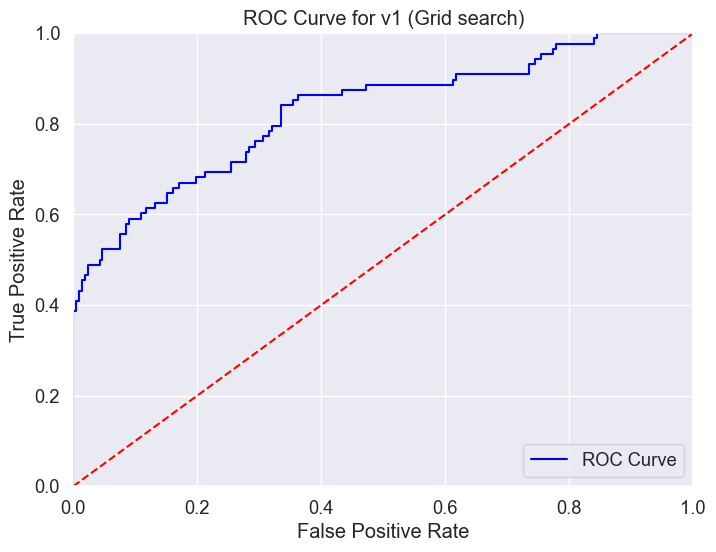

In [62]:


# Load the dataset
original_dataset_path = 'creditcard.csv'
df = pd.read_csv(original_dataset_path)

# Preprocessing phase 
# Select columns
selected_columns = ['Time', 'V1', 'Amount', 'Class']
df_selected = df[selected_columns]

# Selection of 300 fraudulent transactions
df_fraud = df_selected[df_selected['Class'] == 1].sample(n=300, random_state=1)

# Selection of 700 non-fraudulent transactions
df_non_fraud = df_selected[df_selected['Class'] == 0].sample(n=700, random_state=1)

# Combining process of the selected samples
df_balanced = pd.concat([df_fraud, df_non_fraud])

# Split data into features and target
X_balanced = df_balanced[['Time', 'V1', 'Amount']]
y_balanced = df_balanced['Class']

# Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 0.001],  # Regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  # Optimization algorithms
    'max_iter': [150, 100, 50]  # Maximum number of iterations
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=1)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train the Logistic Regression model with the best parameters
best_model = grid_search.best_estimator_
y_pred_balanced = best_model.predict(X_test_balanced) # type: ignore
 
# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
precesion_balanced = precision_score(y_test_balanced, y_pred_balanced)
recall_balanced = recall_score(y_test_balanced, y_pred_balanced)
f1_balanced = f1_score(y_test_balanced, y_pred_balanced)

conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Print the results
print(f"Accuracy: {accuracy_balanced}")
print(f"precision: {precesion_balanced}")
print(f"recall: {recall_balanced}")
print(f"f1 score: {f1_balanced}")
print("Confusion Matrix:")
print(conf_matrix_balanced)
print("Classification Report:")
print(class_report_balanced)

# Compute the ROC curve and ROC AUC score
y_prob_balanced = best_model.predict_proba(X_test_balanced)[:, 1]   # type: ignore
fpr, tpr, thresholds = roc_curve(y_test_balanced, y_prob_balanced)
roc_auc = roc_auc_score(y_test_balanced, y_prob_balanced)

# Plot the ROC curve
plt.figure(figsize=(8, 6), dpi = 100)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for v1 (Grid search)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

v2 columns------------------------------------------------------------------------------

Accuracy: 0.86
precision: 0.7875
recall: 0.7159090909090909
f1 score: 0.7500000000000001
Confusion Matrix:
[[195  17]
 [ 25  63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       212
           1       0.79      0.72      0.75        88

    accuracy                           0.86       300
   macro avg       0.84      0.82      0.83       300
weighted avg       0.86      0.86      0.86       300



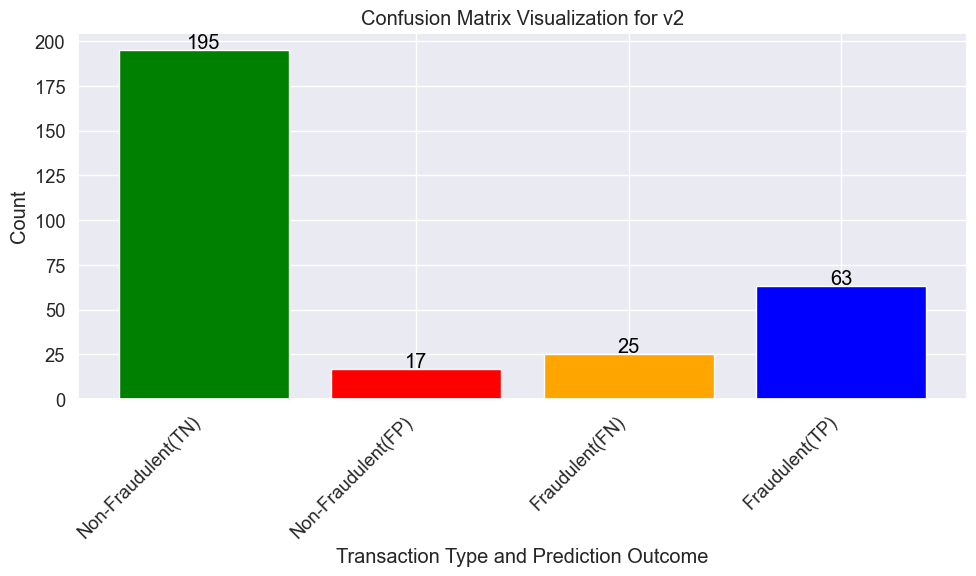

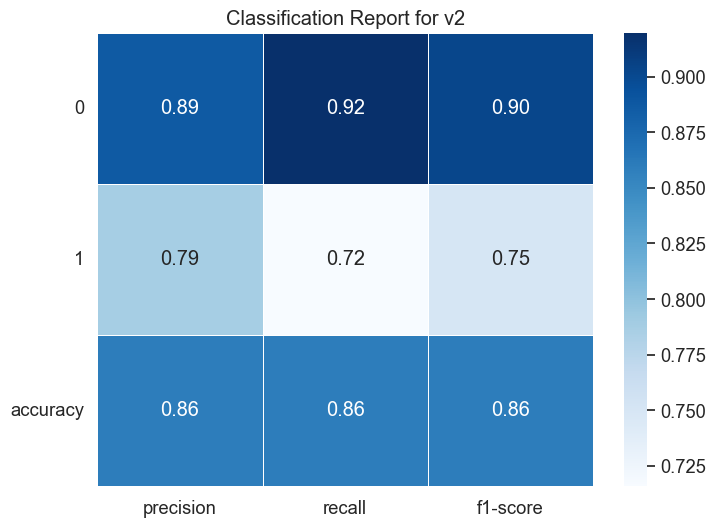

In [63]:

# Load the dataset
original_dataset_path = 'creditcard.csv'
df = pd.read_csv(original_dataset_path)

# Preprocessing phase 
# Select columns
selected_columns = ['Time', 'V2', 'Amount', 'Class']
df_selected = df[selected_columns]

# Selection of 300 fraudulent transactions
df_fraud = df_selected[df_selected['Class'] == 1].sample(n=300, random_state=1)

# Selection of 700 non-fraudulent transactions
df_non_fraud = df_selected[df_selected['Class'] == 0].sample(n=700, random_state=1)

# Combining process of the selected samples
df_balanced = pd.concat([df_fraud, df_non_fraud])

# Split data into features and target
X_balanced = df_balanced[['Time', 'V2', 'Amount']]
y_balanced = df_balanced['Class']

# Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1)

# Build the logistic regression model
model_balanced = LogisticRegression(random_state=1, max_iter=1000)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Predictions on the test set
y_pred_balanced = model_balanced.predict(X_test_balanced)

# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
precesion_balanced = precision_score(y_test_balanced, y_pred_balanced)
recall_balanced = recall_score(y_test_balanced, y_pred_balanced)
f1_balanced = f1_score(y_test_balanced, y_pred_balanced)

conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Print the results
print(f"Accuracy: {accuracy_balanced}")
print(f"precision: {precesion_balanced}")
print(f"recall: {recall_balanced}")
print(f"f1 score: {f1_balanced}")
print("Confusion Matrix:")
print(conf_matrix_balanced)
print("Classification Report:")
print(class_report_balanced)

# Visualization of the confusion matrix as a bar graph with updated labels and counts
labels = [
    'Non-Fraudulent(TN)', 
    'Non-Fraudulent(FP)', 
    'Fraudulent(FN)', 
    'Fraudulent(TP)'
]
counts = [conf_matrix_balanced[0, 0], conf_matrix_balanced[0, 1], conf_matrix_balanced[1, 0], conf_matrix_balanced[1, 1]]

plt.figure(figsize=(10, 6), dpi = 100)
bars = plt.bar(labels, counts, color=['green', 'red', 'orange', 'blue'])

# Add counts on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - (-1), f'{count}', ha='center', color='black')

plt.title('Confusion Matrix Visualization for v2')
plt.xlabel('Transaction Type and Prediction Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Get the classification report as a dictionary
report = classification_report(y_test_balanced, y_pred_balanced, output_dict=True)

# Convert the dictionary to a DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column and the macro avg and weighted avg rows
report_df = report_df.drop(columns=['support'])
report_df = report_df.drop(['macro avg', 'weighted avg'])

# Plotting the heatmap
plt.figure(figsize=(8, 6), dpi = 100)
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)

plt.title('Classification Report for v2')
plt.yticks(rotation=0)
plt.show()


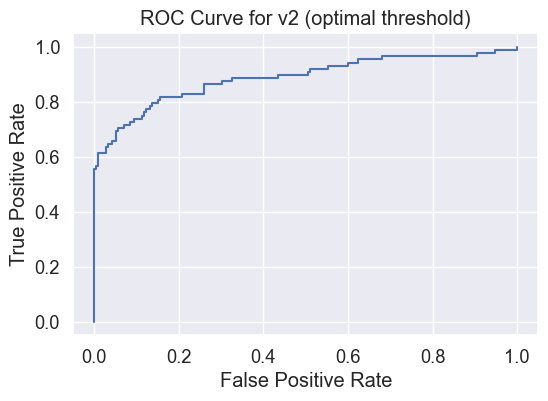

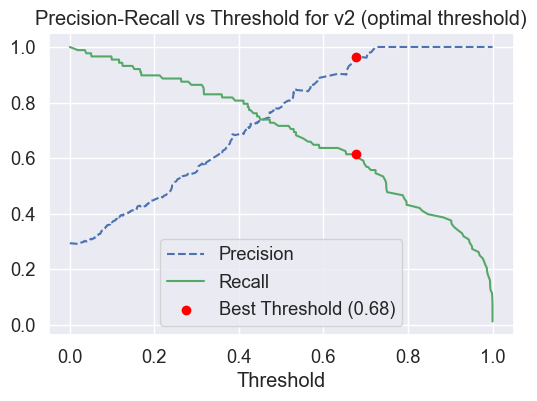

Best Threshold based on Accuracy: 0.68 with Accuracy: 0.88
Accuracy with custom threshold: 0.88
precision: 0.9642857142857143
recall: 0.6136363636363636
f1 score: 0.75
Confusion Matrix with custom threshold:
[[210   2]
 [ 34  54]]
Classification Report with custom threshold:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       212
           1       0.96      0.61      0.75        88

    accuracy                           0.88       300
   macro avg       0.91      0.80      0.84       300
weighted avg       0.89      0.88      0.87       300



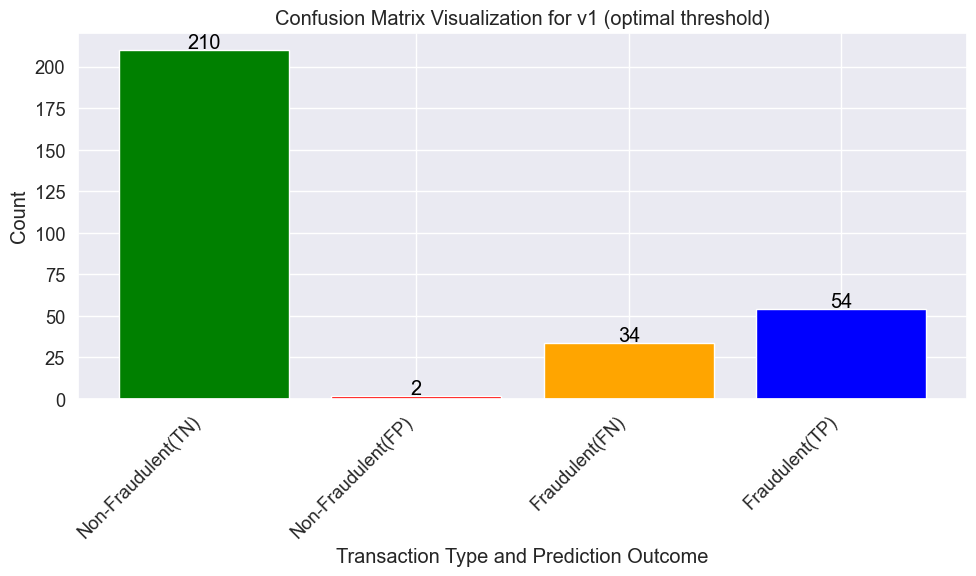

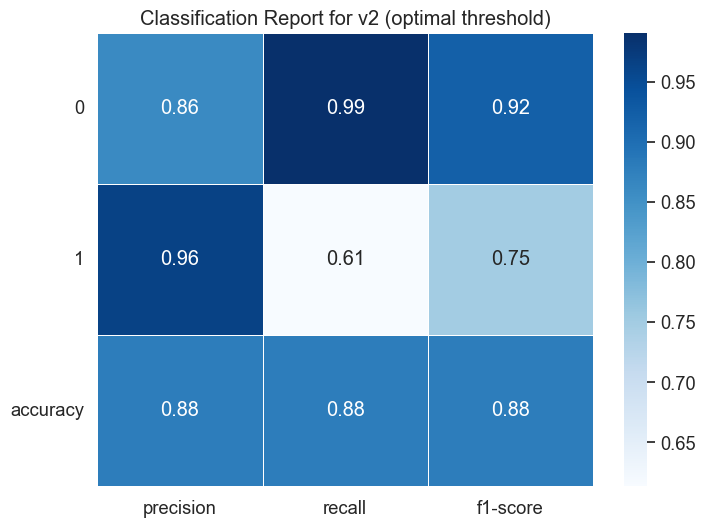

In [64]:
# Step 1: Predict probabilities on the test set
y_probs_balanced = model_balanced.predict_proba(X_test_balanced)[:, 1]

# Step 2: Plot ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test_balanced, y_probs_balanced)
plt.figure( dpi = 100)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for v2 (optimal threshold)")
plt.show()

# Step 3: Plot Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_balanced, y_probs_balanced)

# Find the optimal threshold based on F1 score
thresholds_range = np.linspace(0, 1, num=100)
best_f1 = 0
best_threshold = 0
best_accuracy = 0

for threshold in thresholds_range:
    y_pred_temp = (y_probs_balanced >= threshold).astype(int)
    current_f1 = f1_score(y_test_balanced, y_pred_temp)
    current_accuracy = accuracy_score(y_test_balanced, y_pred_temp)
    
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold



# Plot Precision-Recall Curve and highlight the best threshold
plt.figure( dpi = 100)
plt.plot(thresholds_pr, precision[:-1], "b--", label="Precision")
plt.plot(thresholds_pr, recall[:-1], "g-", label="Recall")

# Highlight the best threshold
optimal_idx_pr = np.argmin(np.abs(thresholds_pr - best_threshold))
plt.scatter(thresholds_pr[optimal_idx_pr], precision[optimal_idx_pr], color='red', label=f"Best Threshold ({best_threshold:.2f})", zorder=5)
plt.scatter(thresholds_pr[optimal_idx_pr], recall[optimal_idx_pr], color='red', zorder=5)

plt.xlabel("Threshold")
plt.title("Precision-Recall vs Threshold for v2 (optimal threshold)")
plt.legend(loc="best")
plt.show()

print(f"Best Threshold based on Accuracy: {best_threshold:.2f} with Accuracy: {best_accuracy:.2f}")

# Step 5: Predict with the best threshold
y_pred_balanced_custom = (y_probs_balanced >= best_threshold).astype(int)

# Step 6: Evaluate the model
accuracy_balanced_custom = accuracy_score(y_test_balanced, y_pred_balanced_custom)
precesion_balanced_custom = precision_score(y_test_balanced, y_pred_balanced_custom)
recall_balanced_custom = recall_score(y_test_balanced, y_pred_balanced_custom)
f1_balanced_custom = f1_score(y_test_balanced, y_pred_balanced_custom)
conf_matrix_balanced_custom = confusion_matrix(y_test_balanced, y_pred_balanced_custom)
class_report_balanced_custom = classification_report(y_test_balanced, y_pred_balanced_custom)

# Print the results
print(f"Accuracy with custom threshold: {accuracy_balanced_custom}")
print(f"precision: {precesion_balanced_custom}")
print(f"recall: {recall_balanced_custom}")
print(f"f1 score: {f1_balanced_custom}")
print("Confusion Matrix with custom threshold:")
print(conf_matrix_balanced_custom)
print("Classification Report with custom threshold:")
print(class_report_balanced_custom)

# Visualization of the confusion matrix as a bar graph with updated labels and counts
labels = [
    'Non-Fraudulent(TN)', 
    'Non-Fraudulent(FP)', 
    'Fraudulent(FN)', 
    'Fraudulent(TP)'
]
counts = [conf_matrix_balanced_custom[0, 0], conf_matrix_balanced_custom[0, 1], conf_matrix_balanced_custom[1, 0], conf_matrix_balanced_custom[1, 1]]

plt.figure(figsize=(10, 6), dpi = 100)
bars = plt.bar(labels, counts, color=['green', 'red', 'orange', 'blue'])

# Add counts on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - (-1), f'{count}', ha='center', color='black')

plt.title('Confusion Matrix Visualization for v1 (optimal threshold)')
plt.xlabel('Transaction Type and Prediction Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Get the classification report as a dictionary
report = classification_report(y_test_balanced, y_pred_balanced_custom, output_dict=True)

# Convert the dictionary to a DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column and the macro avg and weighted avg rows
report_df = report_df.drop(columns=['support'])
report_df = report_df.drop(['macro avg', 'weighted avg'])

# Plotting the heatmap
plt.figure(figsize=(8, 6), dpi = 100)
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)

plt.title('Classification Report for v2 (optimal threshold)')
plt.yticks(rotation=0)
plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'C': 1, 'max_iter': 50, 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.86
Accuracy: 0.9
precision: 0.9264705882352942
recall: 0.7159090909090909
f1 score: 0.8076923076923077
Confusion Matrix:
[[207   5]
 [ 25  63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       212
           1       0.93      0.72      0.81        88

    accuracy                           0.90       300
   macro avg       0.91      0.85      0.87       300
weighted avg       0.90      0.90      0.90       300



c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


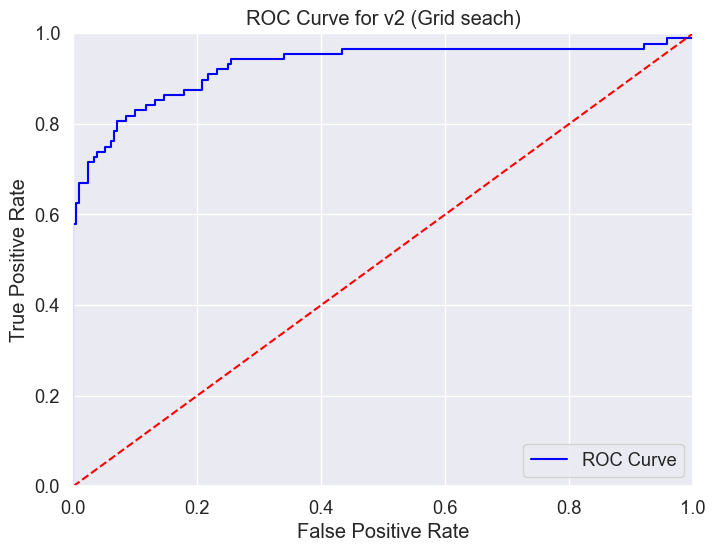

In [65]:
# Load the dataset
original_dataset_path = 'creditcard.csv'
df = pd.read_csv(original_dataset_path)

# Preprocessing phase 
# Select columns
selected_columns = ['Time', 'V2', 'Amount', 'Class']
df_selected = df[selected_columns]

# Selection of 300 fraudulent transactions
df_fraud = df_selected[df_selected['Class'] == 1].sample(n=300, random_state=1)

# Selection of 700 non-fraudulent transactions
df_non_fraud = df_selected[df_selected['Class'] == 0].sample(n=700, random_state=1)

# Combining process of the selected samples
df_balanced = pd.concat([df_fraud, df_non_fraud])

# Split data into features and target
X_balanced = df_balanced[['Time', 'V2', 'Amount']]
y_balanced = df_balanced['Class']

# Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 0.001],  # Regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  # Optimization algorithms
    'max_iter': [150, 100, 50]  # Maximum number of iterations
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=1)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train the Logistic Regression model with the best parameters
best_model = grid_search.best_estimator_
y_pred_balanced = best_model.predict(X_test_balanced) # type: ignore
 
# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
precesion_balanced = precision_score(y_test_balanced, y_pred_balanced)
recall_balanced = recall_score(y_test_balanced, y_pred_balanced)
f1_balanced = f1_score(y_test_balanced, y_pred_balanced)

conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Print the results
print(f"Accuracy: {accuracy_balanced}")
print(f"precision: {precesion_balanced}")
print(f"recall: {recall_balanced}")
print(f"f1 score: {f1_balanced}")
print("Confusion Matrix:")
print(conf_matrix_balanced)
print("Classification Report:")
print(class_report_balanced)

# Compute the ROC curve and ROC AUC score
y_prob_balanced = best_model.predict_proba(X_test_balanced)[:, 1]   # type: ignore
fpr, tpr, thresholds = roc_curve(y_test_balanced, y_prob_balanced)
roc_auc = roc_auc_score(y_test_balanced, y_prob_balanced)

# Plot the ROC curve
plt.figure(figsize=(8, 6),dpi = 100)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for v2 (Grid seach)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
